# Bracket search

In this section, we will consider methods that only require function values. In particular, we will consider several bracketing search methods. In <i>bracketing search methods</i>, we evaluate the function many times in a given interval to find the maximum or minimum value within that interval.

A function $f(x)$ is <i>unimodal</i> on a given interval if
- $f(x)$ is monotonically decreasing (increasing) on (a,p)
- $f(x)$ is monotonically increasing (decreasing) on (p,b)

In other words, the function $f(x)$ has only one extremum in the interval. The extremum is at point $p$.

This section will show several simple optimization methods. These are all different types of bracket search methods.

## Simple bracket search

Assume $f(x)$ has a minimum value (if it has a maximum value, it can simply be replaced by $-f$). If $f(x)$ is unimodal on $(a,b)$, we can replace $(a,b)$ with a sub-interval on which $f(x)$ takes its minimum value.
We choose $\alpha$ and $\beta$ in the interval $(a,b)$ so that $\alpha < \beta$. The unimodality of $f(x)$ guarantees that $f(\alpha) < \max[f(a),f(b)]$ and $f(\beta) < \max[f(a),f(b)]$.

If $f(\alpha) < f(\beta)$, then $p < \beta$, so $p \in (a,\beta)$. If $f(\alpha) > f(\beta)$ implies $p > \alpha$, thus $p \in (\alpha,b)$.

Repeating the process of picking pairs $\alpha < \beta$ and reducing the interval containing the point $p$ will iteratively yield the minimum point.


Number of function evaluations:  44


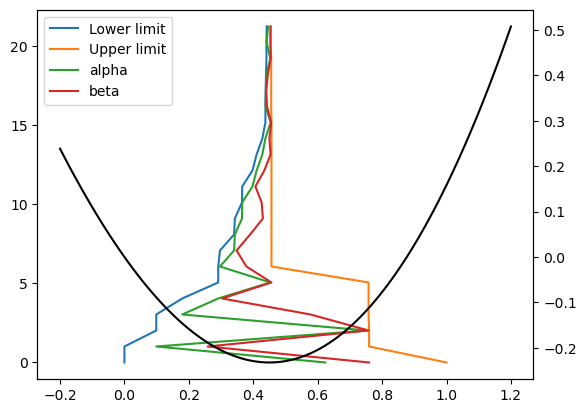

In [11]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

class CbracketMethods:
    def __init__(self):
        #Maximum number of iterations
        self.iN = 100
        self.an = np.linspace(0,self.iN,self.iN)

        #Error tolerance
        self.feps = 1e-2

        #Storing values during run for later plotting
        self.afA=np.zeros(self.iN)
        self.afB=np.zeros(self.iN)
        self.afAlpha=np.zeros(self.iN)
        self.afBeta=np.zeros(self.iN)

        #Starting values for our interval [a,b] and internal points alpha and beta
        self.afA[0] = 0
        self.afB[0] = 1

    # The function to minimize
    def func(self,fx):
        return fx**2 - np.sin(fx)

    # A common plotting function for all bracket methods
    def plotSolution(self,ii):
        #Create an intervall x to plot f(x)
        axv = np.linspace(-0.2,1.2,100)

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()

        ax1.plot(self.afA[:ii],self.an[:ii],label='Lower limit')
        ax1.plot(self.afB[:ii],self.an[:ii],label='Upper limit')
        ax1.plot(self.afAlpha[:ii],self.an[:ii],label='alpha')
        ax1.plot(self.afBeta[:ii],self.an[:ii],label='beta')
        ax2.plot(axv,self.func(axv),color='k')
        ax1.legend(loc='upper left')
        plt.show()  

    def simple(self):
        # This is an iterative algorithm, an we iterate over ii
        ii=0
        while(ii<self.iN and (self.afB[ii]-self.afA[ii])>self.feps):
            #Picking two random numbers between a and b
            self.afAlpha[ii]=(self.afB[ii]-self.afA[ii])*random()+self.afA[ii]
            # we could have picked beta in between b and alpha as
            #    beta[ii]=(b[ii]-alpha[ii])*random()+alpha[ii]
            # which would have a simple code, but then the numbers are not randomly
            # distributed anymore
            self.afBeta[ii]=(self.afB[ii]-self.afA[ii])*random()+self.afA[ii]
            #If beta is larger than alpha, then switch the numbers
            if self.afBeta[ii]<self.afAlpha[ii]:
                fTemp=self.afAlpha[ii]
                self.afAlpha[ii]=self.afBeta[ii]
                self.afBeta[ii]=fTemp
            falpha=self.func(self.afAlpha[ii])
            fbeta=self.func(self.afBeta[ii])
            ii+=1
            if falpha<fbeta:
                self.afA[ii]=self.afA[ii-1]
                self.afB[ii]=self.afBeta[ii-1]
            else:
                self.afA[ii]=self.afAlpha[ii-1]
                self.afB[ii]=self.afB[ii-1]

        print('Number of function evaluations: ',2*ii)
        self.plotSolution(ii)
        
tBracketSearch=CbracketMethods()
tBracketSearch.simple()

Let us try to improve this method by choosing the new locations $\alpha < \beta$ better than just random values. The obvious choice would be to spread them out evenly in the space $[a,b]$, thus, let 
$$\begin{align}
\alpha &= \frac{1}{3}(b-a) +a \\
\beta &= b -\frac{1}{3}(b-a) \\
\end{align}$$

This is implemented below.

Number of function evaluations:  24


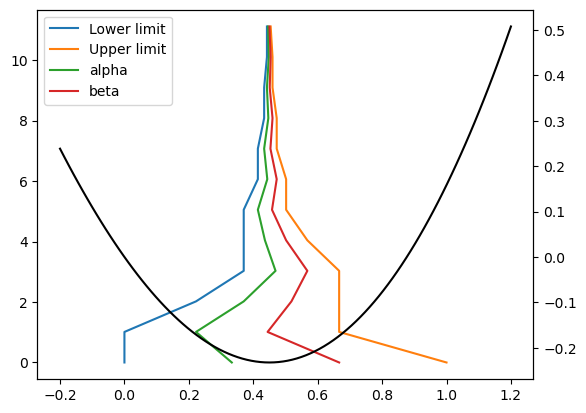

In [14]:
def evenBracket(self):
    ii=0
    while(ii<self.iN and (self.afB[ii]-self.afA[ii])>self.feps):
        #Picking two evenly distributed numbers between a and b
        self.afAlpha[ii]=(self.afB[ii]-self.afA[ii])*(1/3)+self.afA[ii]
        self.afBeta[ii]=self.afB[ii]-(self.afB[ii]-self.afA[ii])*(1/3)
        #Function evaluation
        falpha=self.func(self.afAlpha[ii])
        fbeta=self.func(self.afBeta[ii])
        ii+=1
        if falpha<fbeta:
            self.afA[ii]=self.afA[ii-1]
            self.afB[ii]=self.afBeta[ii-1]
        else:
            self.afA[ii]=self.afAlpha[ii-1]
            self.afB[ii]=self.afB[ii-1]
    print('Number of function evaluations: ',2*ii)
    self.plotSolution(ii)


#Adding new function to class
CbracketMethods.evenBracket=evenBracket

tBracketSearch.evenBracket()


Note that with this method, we shrink the bounds by a factor $2/3$ for each iteration. To reach our error tolerance $\epsilon$ we then need to iterate $n$ times so that $(b-a)*(2/3)^n < \epsilon$. Thus, the number of iterations is
\begin{equation}
n = \frac{\ln\left(\frac{\epsilon}{b-a}\right)}{\ln\left(\frac{2}{3}\right)}
\end{equation}
In the code below, we calculate this value.

In [23]:
import math as m

m.log(tBracketSearch.feps/(tBracketSearch.afB[0]-tBracketSearch.afA[0]))/m.log(2/3)

11.357747174535143

We thus see that we need 12 iterations to reach the convergence. This is in accordance with the simulation result above.


## Golden ratio method

A simple bracket search where the $\alpha$ and $\beta$ values are chosen randomly is ineffective. The method where they separate the space $[a,b]$ might be efficient when considering the number of iterations, but not necessarily when considering the number of function evaluations. We therefore want a method where we only need one new function evaluation for each iteration. For such a method to be efficient, it will turn out that the three distances between the points $a < \alpha < \beta < b$ will have the ratios $\phi : 1 : \phi$, where $\phi$ is the golden ratio. Thereby its name.

For simplicity we choose $\alpha$ and $\beta$ such that the intervals $(a,\alpha)$ and $(\beta,b)$ are symmetrical.

$$b-\beta  = \alpha-a$$

Thus, if $\alpha$ is given, then we know $\beta$ from

$$\beta = a + b - \alpha$$

In this method, the function value at either $f(\alpha)$ or $f(\beta)$ has already been evaluated at the previous iteration (except for the first iteration). This saves one function evaluation and speeds up the search process.

To ensure that the resulting new interval has the same ratios between the three evaluated points as the previous interval, we must have

$$\frac{\alpha-a}{\beta - \alpha} = \frac{\beta - a}{b -a}$$

Assuming the ratios $\phi : 1 : \phi$, this gives

$$\frac{\phi}{1+\phi} = \frac{1+\phi}{1+2\phi}$$

This is one equation with one unknown, which we can solve for:

$$\begin{align}
\frac{\phi}{1+\phi} &= \frac{1+\phi}{1+2\phi} \\
2 \phi^2 + \phi &= \phi^2 + 2\phi +1 \\
\phi^2-\phi -1 &= 0
\end{align}$$

The solution to the quadratic equation
$$Ax^2 +Bx + C = 0$$
is
$$\frac{-B \pm \sqrt{B^2-4AC}}{2A}$$

In our case, with $A=1,B=-1,C=-1$, we get
$$\frac{1 \pm \sqrt{5}}{2}$$
Since we need a positive $\phi$, we then have
$$\phi = \frac{1 +\sqrt{5}}{2}$$
This is exactly the golden ratio.

We see that we need to have our test points $\alpha$ and $\beta$ a fraction $r=\frac{\phi}{1+2\phi}$ from the ends. The algorithm is then given as
1. $$\begin{align}
      \alpha_i & =  a_i + r(b_i-a_i) \\
      \beta_i  & = b_i - r(b_i-a_i)
      \end{align}$$
2. if $f(\alpha_i) < f(\beta_i)$, then $(a_{i+1},b_{i+1}) = (a_i,\beta_i)$
3. else $(a_{i+1},b_{i+1}) = (\alpha_i,b_i)$



Number of funcation evaluations:  10


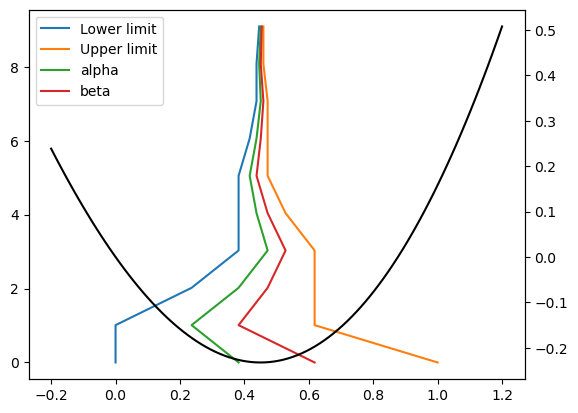

In [17]:
def goldenRatio(self):
    #The golden ration
    phi = (1+np.sqrt(5))/2
    #The fractional distance
    r=phi/(2*phi+1)

    #Starting values for our internal points alpha and beta
    self.afAlpha[0] = self.afA[0]+r*(self.afB[0]-self.afA[0])
    self.afBeta[0]  = self.afB[0]-r*(self.afB[0]-self.afA[0])

    #Evaluate the function at point alpha and beta.
    falpha = self.func(self.afAlpha[0]) 
    fbeta  = self.func(self.afBeta[0])

    ii=0
    while(ii<self.iN and (self.afB[ii]-self.afA[ii])>self.feps):
        ii+=1
        if falpha<fbeta:
            #New endpoints
            #Keep our a point
            self.afA[ii]=self.afA[ii-1]
            #Our new b will be the old beta
            self.afB[ii]=self.afBeta[ii-1]
            #New internal points
            #Our new beta point will be the old alpha
            self.afBeta[ii]=self.afAlpha[ii-1]
            #Calculate a new alpha
            self.afAlpha[ii]=self.afA[ii]+r*(self.afB[ii]-self.afA[ii])
            #One new function evaluation
            #The new f(beta) is the old value of f(alpha)
            fbeta=falpha
            #Calculate a new f(alpha) value based on our new alpha point
            falpha=self.func(self.afAlpha[ii])
        else:
            #New endpoints
            #Our new a will be the old alpha
            self.afA[ii]=self.afAlpha[ii-1]
            #Keep our b point
            self.afB[ii]=self.afB[ii-1]
            #New internal points
            #Our new alpha point will be the old beta
            self.afAlpha[ii]=self.afBeta[ii-1]
            #Calculate a new beta
            self.afBeta[ii]=self.afB[ii]-r*(self.afB[ii]-self.afA[ii])
            #One new function evaluation
            #The new f(alpha) is the old value of f(beta)
            falpha=fbeta
            #We have to calculate the new f(beta)
            fbeta=self.func(self.afBeta[ii])

    print('Number of funcation evaluations: ',ii)
    self.plotSolution(ii)


#Adding new function to class
CbracketMethods.goldenRatio=goldenRatio

tBracketSearch.goldenRatio()


## Fibonacci method

The Fibonacci numbers are given by $F_n = F_{n-1} + F_{n-2}$, with $F_0 = 0$ and $F_1 = 1$. This gives the Fibonacci numbers as $0,1,1,2,3,5,8,13,21 \dots$.

Fibonacci search differs from the golden section search only in the way $r$ is chosen. In the Fibonacci search, $r$ is not constant in each 
subinterval, but rather chosen by
$$r_k = \frac{F_{n-k-1}}{F_{n-k}}$$

It can be shown that for a tolerance $\epsilon$, we will need $n$ iterations where $n$ is the smallest number such that $$F_n > \frac{b_0- a_0}{\epsilon}$$


The algorithm is now:
1. Find $n$ for a given tolerance $\epsilon$.
2. For i from 0 to $n-3$ do: 
     1. $r_i = \frac{F_{n-i-1}}{F_{n-i}}$
     2. $\alpha_i = a_i + (1-r_i)(b_i-a_i)$
     3. $\beta_i = a_i + r_i(b_i-a_i)$
     4. If $f(\alpha_i) < f(\beta_i): (a_{i+1},b_{i+1}) = (a_i,\beta_i)$
     5. Else:  $(a_{i+1},b_{i+1}) = (\alpha_i,b_i)$

The Fibonacci search had some advantages in the old days, as it used more addition and subtraction and less division and multiplication. Since division and multiplication are more computationally demanding than addition and subtraction, this was important when the computers were less powerful. This is typically not a big issue anymore with modern-day computing.

Note that the ratio of two consecutive numbers in the Fibonacci sequence converges towards the golden ratio.

Number of funcation evaluations:  20


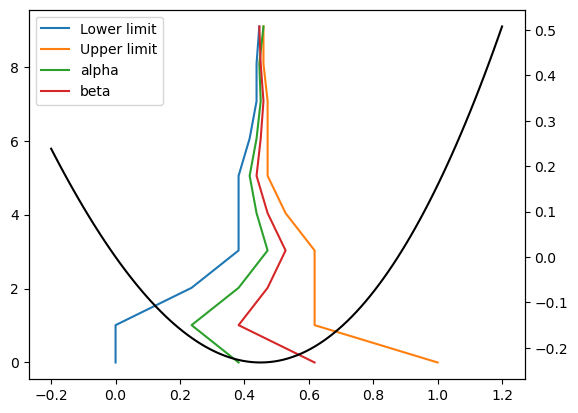

In [21]:
def fibonacci(self):
    #Fibonacci numbers
    afF=np.zeros(self.iN)
    afF[0]=0
    afF[1]=1
    for ii in range(2,self.iN):
        afF[ii]=afF[ii-1]+afF[ii-2]

    #Criterion for max Fibonacci index
    fCrit = (self.afB[0]-self.afA[0])/self.feps
    #Maximum Fibonacci index
    iNmax = np.argmax(afF>fCrit)

    #Calculate r-values
    afr=np.zeros(self.iN)
    for ii in np.arange(0,iNmax-3):
        afr[ii] = afF[iNmax-ii]/afF[iNmax-ii+1]

    self.afAlpha[0] = self.afA[0]+(1-afr[0])*(self.afB[0]-self.afA[0])
    self.afBeta[0]  = self.afB[0]-(1-afr[0])*(self.afB[0]-self.afA[0])

    #Evaluate the function at point alpha and beta.
    falpha = self.func(self.afAlpha[0]) 
    fbeta  = self.func(self.afBeta[0])

    ii=0
    while(ii<self.iN and (self.afB[ii]-self.afA[ii])>self.feps):
        ii+=1
        if falpha<=fbeta:
            #New endpoints
            #Keep our a point
            self.afA[ii]=self.afA[ii-1]
            #Our new b will be the old beta
            self.afB[ii]=self.afBeta[ii-1]
        else:
            #New endpoints
            #Our new a will be the old alpha
            self.afA[ii]=self.afAlpha[ii-1]
            #Keep our b point
            self.afB[ii]=self.afB[ii-1]
        #New internal points
        #Calculate a new alpha and beta
        self.afAlpha[ii]=self.afA[ii]+(1-afr[ii])*(self.afB[ii]-self.afA[ii])
        self.afBeta[ii]=self.afA[ii]+afr[ii]*(self.afB[ii]-self.afA[ii])
        #Two new function evaluation
        falpha=self.func(self.afAlpha[ii])
        fbeta=self.func(self.afBeta[ii])

    print('Number of funcation evaluations: ',2*ii)
    self.plotSolution(ii)


#Adding new function to class
CbracketMethods.fibonacci=fibonacci

tBracketSearch.fibonacci()



[Previous note](optimization.ipynb) -- [Next note](gradientMethods.ipynb)